In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install gudhi

In [39]:
import gudhi

Begin with defining functions for generating and plotting the circles


In [3]:
def generate_noisy_circle(n=200, radius=1, center=(0, 0), noise_std=0.1):
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=n)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx, cy = center
    base = np.column_stack([cx + radius * ux, cy + radius * uy])
    noise = np.random.rand(n,2)
    points = base + noise_std*radius*noise
    return points

def generate_nested_noisy_circles(n=200, radius_in=1, radius_out=2, center=(0, 0), noise_std=0.1):
    return generate_noisy_circle(radius = radius_in), generate_noisy_circle(radius=radius_out)

def generate_disjoint_noisy_circles(n=200, radius=1, center_1=(0, 0), center_2=(4,0), noise_std=0.1):
    return generate_noisy_circle(center=center_1), generate_noisy_circle(center=center_2)

def generate_adjacent_noisy_circles(n=200, radius=1, center_1=(0, 0), center_2=(2,0), noise_std=0.1):
    return generate_noisy_circle(center=center_1), generate_noisy_circle(center=center_2)

In [5]:
def plot_noisy_circles(points_1, points_2, title="Noisy Circle"):
    plt.figure(figsize=(6, 6))
    plt.scatter(points_1[:, 0], points_1[:, 1], s=30, c="#1f77b4")
    plt.scatter(points_2[:, 0], points_2[:, 1], s=30, c="#1f77b4")
    plt.gca().set_aspect("equal", "box")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.title(title)
    plt.tight_layout()
    plt.show()

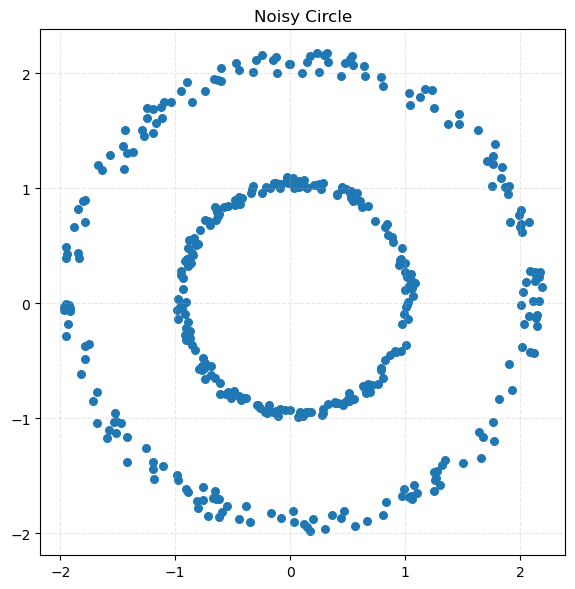

In [45]:
points_1,points_2 = generate_nested_noisy_circles(n=200, radius_in=1, radius_out=2, center=(0, 0), noise_std=0.1)
plot_noisy_circles(points_1,points_2)

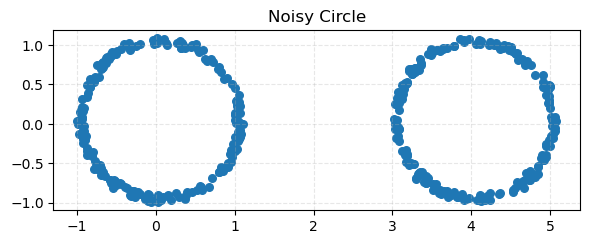

In [48]:
points_1, points_2 = generate_disjoint_noisy_circles()
plot_noisy_circles(points_1,points_2)

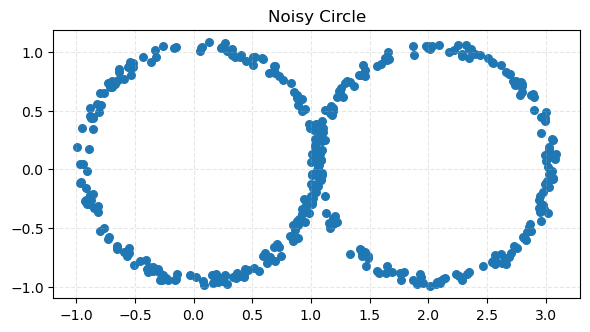

In [50]:
points_1, points_2 = generate_adjacent_noisy_circles()
plot_noisy_circles(points_1,points_2)

## Question i\)


In [109]:
sample_size = 100
data = []
for i in range(sample_size):
    points_1, points_2 = generate_nested_noisy_circles()
    data.append(points_1+points_2)
    points_1, points_2 = generate_disjoint_noisy_circles()
    data.append(points_1+points_2)
    points_1, points_2 = generate_adjacent_noisy_circles()
    data.append(points_1+points_2)

## Question ii)

Following this notebook
https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-representations.ipynb
and this article 
https://medium.com/@a.cervantes2012/interpreting-and-validating-clustering-results-with-k-means-e98227183a4d

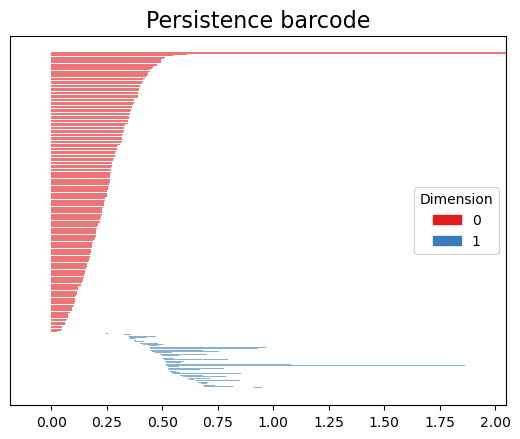

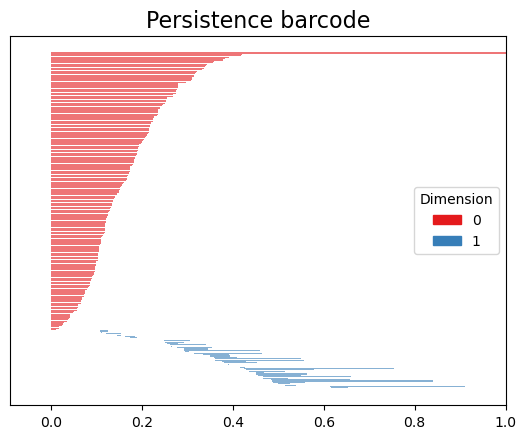

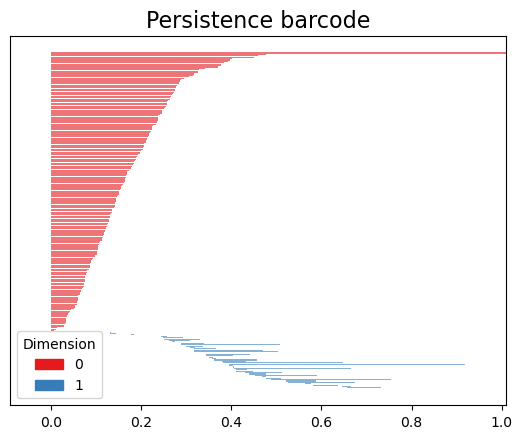

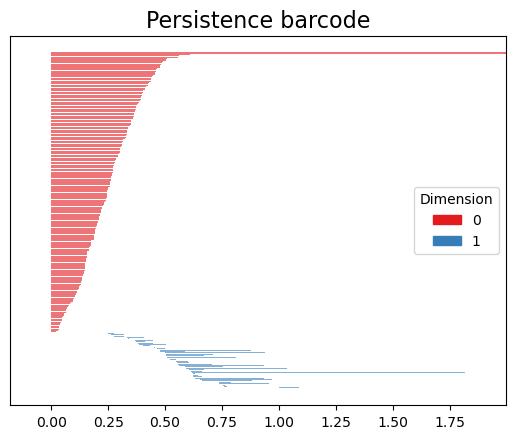

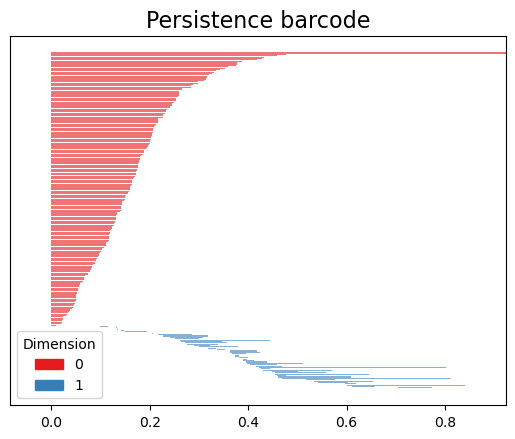

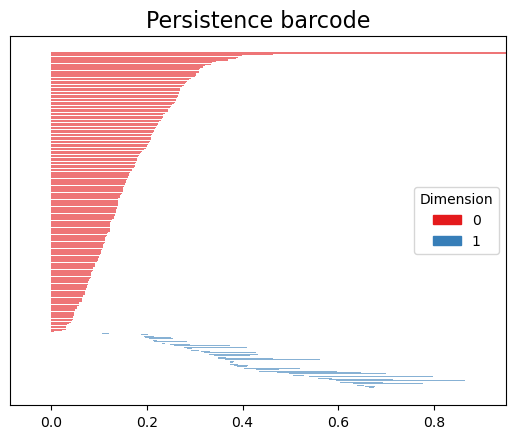

KeyboardInterrupt: 

In [93]:
for i in range(0, 300):
    rips_complex = gudhi.RipsComplex(points = data[i])
    st = rips_complex.create_simplex_tree(max_dimension=2)
    PH = st.persistence()
    gudhi.plot_persistence_barcode(PH, legend=True)
    plt.show()

In [218]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Brice's attempt

In [223]:
def persistence_diagrams(points):
    rips = gudhi.RipsComplex(points=points)
    st = rips.create_simplex_tree(max_dimension=2)
    st.persistence()
    
    H0 = st.persistence_intervals_in_dimension(0)
    H1 = st.persistence_intervals_in_dimension(1)
    return H0, H1

In [149]:
from gudhi.representations import PersistenceImage

PI = PersistenceImage(bandwidth=0.05, weight=lambda bd: bd[1] - bd[0], resolution=[20, 20])


In [257]:
def fit_my_data(data):
    features = []
    for points in data:
        _, H1 = persistence_diagrams(points)
        vec = PI.fit_transform([H1])[0]
        features.append(vec)
    
    X = np.array(features)   # shape (300, d)
    kmeans = KMeans(n_clusters=3, random_state = 0)
    clusters = kmeans.fit_predict(X)
    return X, clusters
X, labels = fit_my_data(data)
X, labels

(array([[-2.00704873e+01, -2.62671406e+01, -2.94821758e+01, ...,
          1.60360824e-03,  8.87713091e-05,  3.43922600e-06],
        [-1.19041846e+01, -2.07954710e+01, -3.74554681e+01, ...,
          1.39508122e-01,  2.61466828e-02,  3.81261996e-03],
        [-1.08449723e+01, -1.88106110e+01, -3.18429782e+01, ...,
         -2.18751630e+00, -9.28822201e-01, -3.01633295e-01],
        ...,
        [-3.67064056e+01, -5.05294329e+01, -6.65814295e+01, ...,
          3.30360512e-03,  2.37916308e-04,  1.24281592e-05],
        [-2.08717845e+01, -3.14386560e+01, -4.51325136e+01, ...,
         -1.67504810e+00, -3.13074306e-01, -4.02099332e-02],
        [-1.44727377e+01, -1.95816559e+01, -2.52068869e+01, ...,
         -7.26020609e-01, -3.17852224e-01, -1.34784380e-01]]),
 array([2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2,
        0, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0,
        1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       

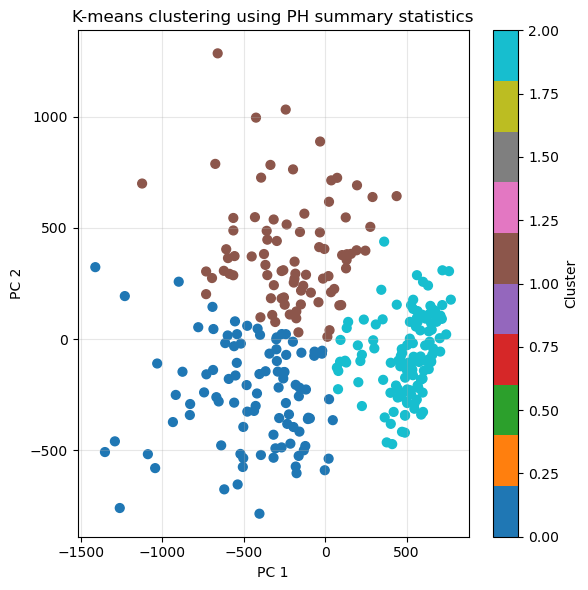

In [259]:
def pca_vis(persistent_homology, clusters):
    """
    INPUT: persistent_homology -> numpy array
           clusters ->  numpy array (1,d) kmeans fitted data
    """
    pca = PCA(n_components=2)
    PH_2d = pca.fit_transform(persistent_homology)
    
    
    plt.figure(figsize=(6, 6))
    plt.scatter(
        PH_2d[:, 0],
        PH_2d[:, 1],
        c=clusters,
        cmap="tab10",
        s=40
    )
    
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.title("K-means clustering using PH summary statistics")
    plt.colorbar(label="Cluster")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('cluster.png') 
    plt.show()
    
pca_vis(X,labels)

## Zihan's code
This is preferred, as the clustering looks much nicer!

In [261]:
def split_dgms(persistence):
    dgm0, dgm1 = [], []
    for dim, (b,d) in persistence:
        if d == float("inf"):
            continue
        if dim == 0:
            dgm0.append([b,d])
        elif dim == 1:
            dgm1.append([b,d])
    return np.array(dgm0), np.array(dgm1)

def diagram_stats(dgm):
    if len(dgm) == 0:
        return np.zeros(4)
    pers = dgm[:,1] - dgm[:,0]
    return np.array([len(pers), pers.mean(), pers.max(), pers.sum()])

def ph(persistence):
    dgm0, dgm1 = split_dgms(persistence)
    v0, v1 = diagram_stats(dgm0), diagram_stats(dgm1)
    return np.concatenate([v0,v1])


def cluster_data(data):
    PH = []
    for points in data:
        rips = gudhi.RipsComplex(points=points)
        st = rips.create_simplex_tree(max_dimension=2)
        PH.append(ph(st.persistence()))
    
    PH = np.array(PH)
    kmeans = KMeans(n_clusters=3, random_state = 0)
    clusters = kmeans.fit_predict(PH)
    return PH, clusters

PH, clusters = cluster_data(data)
PH, clusters

(array([[1.99000000e+02, 2.41466895e-01, 6.16987296e-01, ...,
         1.72778866e-01, 1.26899584e+00, 5.52892372e+00],
        [1.99000000e+02, 1.67039163e-01, 4.80921057e-01, ...,
         9.50618596e-02, 5.21404069e-01, 3.80247438e+00],
        [1.99000000e+02, 1.73888011e-01, 4.56543840e-01, ...,
         7.84966386e-02, 3.51832158e-01, 3.53234874e+00],
        ...,
        [1.99000000e+02, 2.55161887e-01, 5.90319212e-01, ...,
         1.46555336e-01, 1.22406703e+00, 6.15532413e+00],
        [1.99000000e+02, 1.68660640e-01, 4.71412986e-01, ...,
         7.69840342e-02, 2.42731543e-01, 3.23332944e+00],
        [1.99000000e+02, 1.70069361e-01, 4.27760184e-01, ...,
         8.58342028e-02, 3.00217357e-01, 3.34753391e+00]]),
 array([1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 0, 1,
        0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0,
        0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0,
        1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2,

# PCA to visualise kmeans clustering

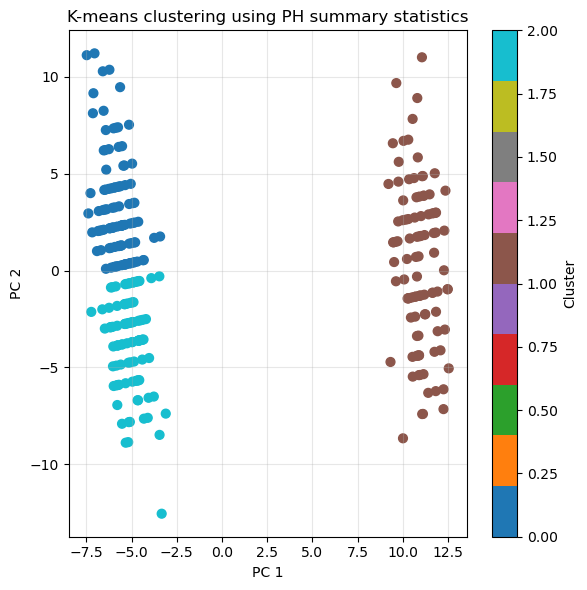

In [263]:
pca_vis(PH,clusters)

## Question iii)
First observe what the PCA plot looks like with increased noise_std when generating our point clouds 

In [265]:
sample_size = 100
noisier_data = []
for i in range(sample_size):
    points_1, points_2 = generate_nested_noisy_circles(noise_std=0.5)
    noisier_data.append(points_1+points_2)
    points_1, points_2 = generate_disjoint_noisy_circles(noise_std=0.5)
    noisier_data.append(points_1+points_2)
    points_1, points_2 = generate_adjacent_noisy_circles(noise_std=0.5)
    noisier_data.append(points_1+points_2)

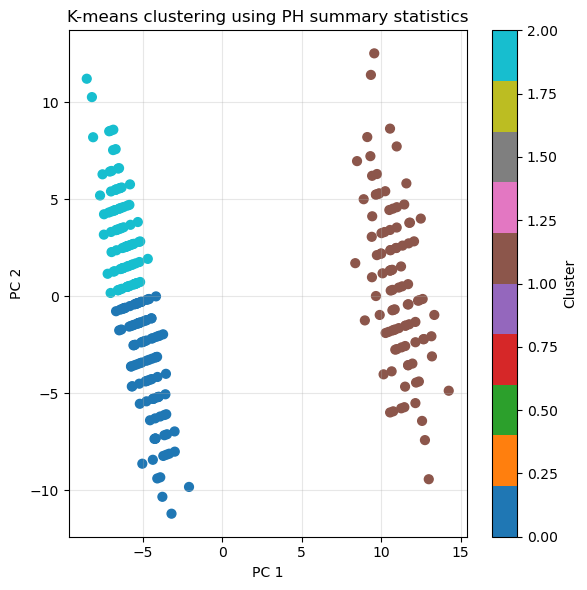

In [269]:
noisier_PH, noisier_clusters = cluster_data(noisier_data)
pca_vis(noisier_PH,noisier_clusters)

In [275]:
np.unique(noisier_clusters, return_counts=True)

(array([0, 1, 2]), array([107, 100,  93], dtype=int64))

So we fail to classify some nested circles and adjacent circles. 

## Question iv)

In [178]:
def generate_random_points(n=10, xlim=(-1.0, 1.0), ylim=(-1.0, 1.0)):
    x = np.random.uniform(xlim[0], xlim[1], size=n)
    y = np.random.uniform(ylim[0], ylim[1], size=n)
    return np.column_stack([x, y])

def add_outliers(points, n_outliers=20, box_size=1.0):
    outliers = np.random.uniform(low=-box_size, high=box_size, size=(n_outliers, 2))
    return np.vstack([points, outliers])

def plot_noisy_circle(points, title="Noisy Circle"):
    plt.figure(figsize=(6, 6))
    plt.scatter(points[:, 0], points[:, 1], s=30, c="#1f77b4")
    plt.gca().set_aspect("equal", "box")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.title(title)
    plt.tight_layout()
    plt.show()

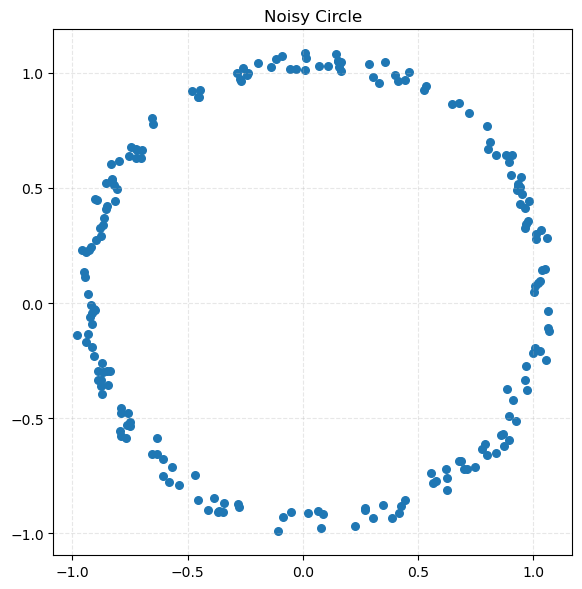

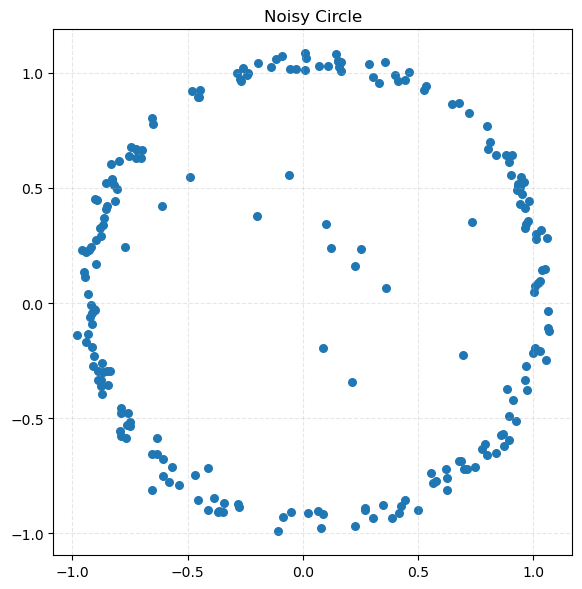

(None, None)

In [184]:
P1 = generate_noisy_circle()
P2 = add_outliers(P1)
plot_noisy_circle(P1), plot_noisy_circle(P2)

In [186]:
def compute_persistence(points):
    rips = gudhi.RipsComplex(points=points)
    st = rips.create_simplex_tree(max_dimension=2)
    st.persistence()
    return st.persistence()

PH1 = compute_persistence(P1)
PH2 = compute_persistence(P2)

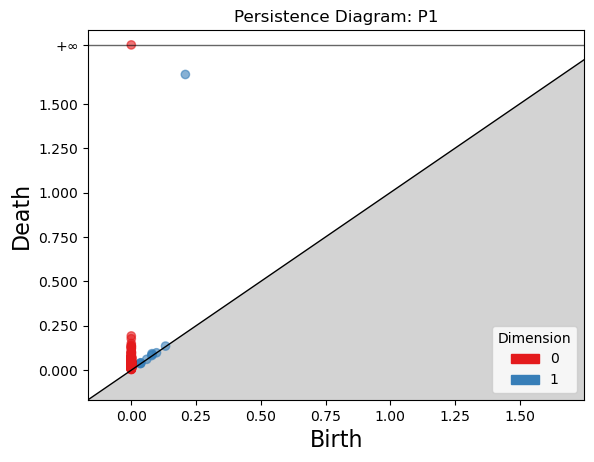

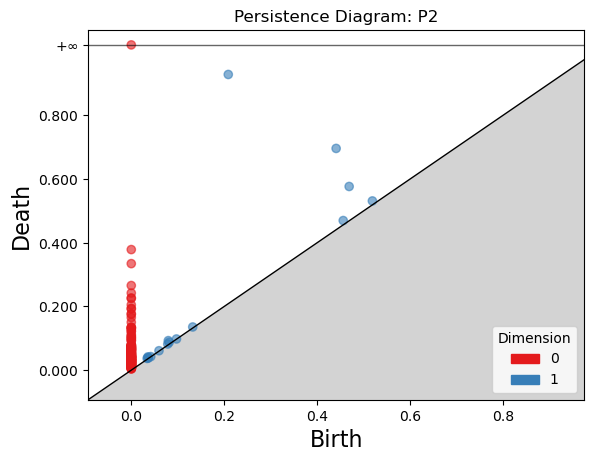

In [188]:
gudhi.plot_persistence_diagram(PH1)
plt.title("Persistence Diagram: P1")
plt.show()

gudhi.plot_persistence_diagram(PH2)
plt.title("Persistence Diagram: P2")
plt.show()


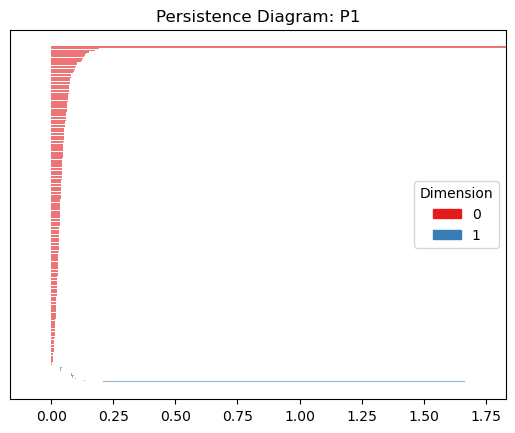

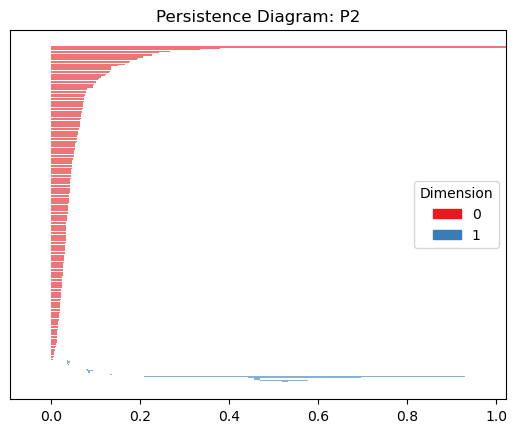

In [190]:
gudhi.plot_persistence_barcode(PH1)
plt.title("Persistence Diagram: P1")
plt.show()

gudhi.plot_persistence_barcode(PH2)
plt.title("Persistence Diagram: P2")
plt.show()